In [2]:
from ccf.core.cross_correlation_functions import WavelengthBin, NormalizedCCF
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.models import Lorentz1D
from scipy.signal import find_peaks
from ccf.constants import c_in_kms

### Step 1: Generate some simulated data based on some line profile model.

In [ ]:
nbins = 5000 # Number of bins
wave_centre = 6564.6 # The centre of the line feature
window = 200 
rv_true = -300 # The true RV value in km/s
shift = (rv_true / c_in_kms) * wave_centre # Shift in wavelength units

line_profile = Lorentz1D(x_0=wave_centre, fwhm=5, amplitude=1.0)
line_profile_shifted = Lorentz1D(x_0=wave_centre + shift, fwhm=5, amplitude=1.0)
noise = np.random.randn(nbins + 1) * 0.3

wave_bin_test = WavelengthBin(wave_centre - 0.5 * window, 
                              wave_centre + 0.5 * window, nbins)

data_tem = line_profile(wave_bin_test.linear_grid)
data_obs = line_profile_shifted(wave_bin_test.linear_grid) + noise



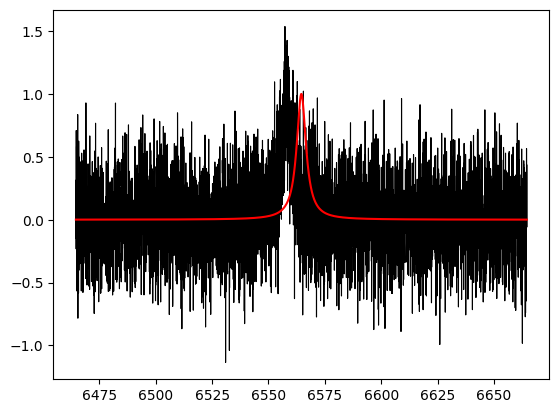

In [4]:
plt.plot(wave_bin_test.linear_grid, data_obs, color="k", lw=0.8)
plt.plot(wave_bin_test.linear_grid, data_tem, color="r", lw=1.5)

In [5]:
ccf_test = NormalizedCCF(data_obs=data_obs, data_temp=data_tem, 
                         bins=wave_bin_test)

In [6]:
print(f"{ccf_test.rv:.2f} +/- {ccf_test.rv_err:.2f} km/s")

-301.43 +/- 35.16 km/s


In [7]:
# To check the Tonry & Davis ratio, use the .r_ratio property.
print(ccf_test.r_ratio)

21.292704257421146


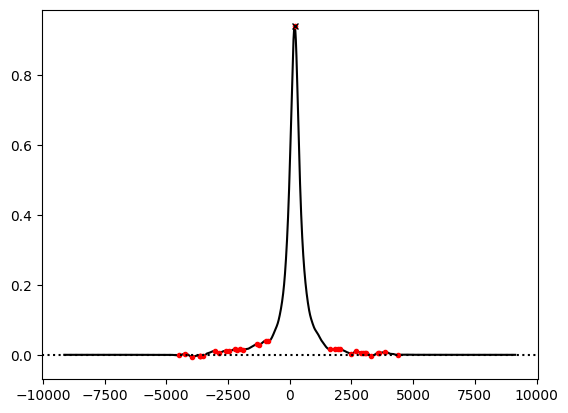

In [39]:
# plt.style.use("mycustomised")
plt.plot(ccf_test.lags_in_kms, ccf_test.ccf(), "k-")
plt.plot(ccf_test.lags_in_kms[ccf_test.ccf_peaks()[0]], ccf_test.ccf_peaks()[1], "ro", ms=3)
# plt.plot(ccf_test.lags, ccf_test.rms_antisymmetric(lag_0=ccf_test.primary_peak_loc), "r-")
plt.plot(ccf_test.rv, ccf_test.primary_peak_height, 
         "rx", ms=5, mec="k")
plt.ylim(-0.07, None)
# plt.xlim(-4500, 4500)
plt.axhline(y=0, color="k", ls=":")

In [40]:
# ((wave_centre + 3.) * Unit("Angstrom")).to("km/s", equivalencies=doppler_optical(rest=wave_centre * Unit("Angstrom")))

In [41]:
ccf_test.primary_peak_loc

np.int64(110)

In [42]:
peak_loc, peak_height = find_peaks(ccf_test.ccf(), height=1)

In [43]:
56 * (1 / (1 + 20)) * ccf_test.bins.log_step * 2.99792458e5

np.float64(4.871635138515906)

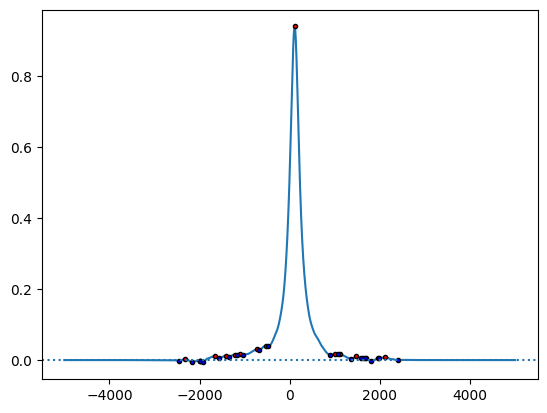

In [44]:
pos_peaks, _  = find_peaks(ccf_test.ccf(), height=None)
neg_peaks, _  = find_peaks(-ccf_test.ccf(), height=None)
pos_peak_heights = ccf[pos_peaks]
neg_peak_heights = np.abs(ccf[neg_peaks])
min_height = 0.001

pos_peaks_valid = pos_peaks[np.where(pos_peak_heights >= min_height)[0]]
neg_peaks_valid = neg_peaks[np.where(neg_peak_heights >= min_height)[0]]

plt.plot(ccf_test.lags, ccf)
plt.plot(ccf_test.lags[pos_peaks_valid], ccf[pos_peaks_valid], "ro", ms=3, mec="k")
plt.plot(ccf_test.lags[neg_peaks_valid], ccf[neg_peaks_valid], "bo", ms=3, mec="k")
plt.axhline(0., ls=":")
# plt.plot(rv_true, ccf_test.primary_peak_height, "rx")
# plt.plot(ccf_test.rv, ccf_test.primary_peak_height, "bo")
# plt.xlim(0, 10)

In [45]:
peaks = np.concatenate((pos_peaks, neg_peaks))
np.sort(peaks)
ccf_test.lags[np.sort(peaks)]

array([-4997, -4993, -4990, ...,  4997,  4998,  4999], shape=(2192,))

200.95 +/- 8.79 km/s
